In [295]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from simulator_fly_wind import FlyWind
from observability import SlidingEmpiricalObservabilityMatrix, FisherObservability, ObservabilityMatrixImage
from util import colorline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set up simulator

In [296]:
# Set time-step
dt = 0.01  # [s]
t_sim = np.arange(0.0, 0.4, step=dt)

In [297]:
# Create simulator object
simulator = FlyWind(dt=dt, output_mode=('phi', 'gamma', 'psi', 'r', 'a', 'g'))

In [298]:
setpoint = simulator.setpoint.copy()
setpoint['v_para'] = 0.3 * np.ones_like(t_sim) + 0.01*t_sim
setpoint['v_perp'] = 0.01 + 0.01*t_sim
setpoint['phi'] = (np.pi/4) * np.ones_like(t_sim)
setpoint['w'] = 0.4 * np.ones_like(t_sim)
setpoint['zeta'] = (np.pi) * np.ones_like(t_sim)
setpoint['z'] = 0.2 * np.ones_like(t_sim)
setpoint['psi_global'] = 0.0 * np.ones_like(t_sim)

setpoint['phi'][20:] = setpoint['phi'][30] - np.pi/2

In [299]:
# Run simulator with set MPC
y_sim = simulator.simulate(x0=None, setpoint=setpoint, run_mpc=True)

In [300]:
# Save simulation data
x0 = simulator.x0.copy()
x_sim = simulator.x.copy()
u_sim = simulator.u.copy()
t_sim = simulator.t.copy()
sim_data = pd.DataFrame(simulator.sim_data)
sim_data

,time,x,y,v_para,v_perp,phi,phidot,w,zeta,z,...,r,r_para,r_perp,setpoint_v_para,setpoint_v_perp,setpoint_phi,setpoint_w,setpoint_zeta,setpoint_z,setpoint_psi_global
0,0.00,0.000000,0.000000,0.300000,0.010000,0.785398,0.000000,0.400000,3.141593,0.2,...,1.500833,1.500000,0.050000,0.3000,0.0100,0.785398,0.4,3.141593,0.2,0.0
1,0.01,0.002050,0.002193,0.300078,0.010110,0.785398,0.000014,0.399999,3.141593,0.2,...,1.501241,1.500390,0.050551,0.3001,0.0101,0.785398,0.4,3.141593,0.2,0.0
2,0.02,0.004101,0.004387,0.300200,0.010200,0.785398,0.000017,0.400000,3.141593,0.2,...,1.501866,1.501000,0.051000,0.3002,0.0102,0.785398,0.4,3.141593,0.2,0.0
3,0.03,0.006152,0.006582,0.300300,0.010300,0.785399,0.000015,0.400000,3.141593,0.2,...,1.502383,1.501500,0.051500,0.3003,0.0103,0.785398,0.4,3.141593,0.2,0.0
4,0.04,0.008202,0.008779,0.300400,0.010400,0.785399,0.000010,0.400000,3.141593,0.2,...,1.502900,1.502000,0.052000,0.3004,0.0104,0.785398,0.4,3.141593,0.2,0.0
5,0.05,0.010253,0.010978,0.300500,0.010500,0.785399,0.000004,0.400000,3.141593,0.2,...,1.503417,1.502500,0.052500,0.3005,0.0105,0.785398,0.4,3.141593,0.2,0.0
6,0.06,0.012303,0.013178,0.300600,0.010600,0.785399,-0.000001,0.400000,3.141593,0.2,...,1.503934,1.503000,0.053000,0.3006,0.0106,0.785398,0.4,3.141593,0.2,0.0
7,0.07,0.014354,0.015379,0.300700,0.010700,0.785399,-0.000006,0.400000,3.141593,0.2,...,1.504452,1.503500,0.053500,0.3007,0.0107,0.785398,0.4,3.141593,0.2,0.0
8,0.08,0.016405,0.017581,0.300800,0.010800,0.785399,-0.000009,0.400000,3.141593,0.2,...,1.504969,1.504000,0.054000,0.3008,0.0108,0.785398,0.4,3.141593,0.2,0.0
9,0.09,0.018455,0.019786,0.300900,0.010900,0.785399,-0.000011,0.400000,3.141593,0.2,...,1.505487,1.504500,0.054500,0.3009,0.0109,0.785398,0.4,3.141593,0.2,0.0


In [301]:
# Rerun with open-loop controls
y_sim = simulator.simulate(x0=x0, u=u_sim)

# Save simulation data
x_sim = simulator.x.copy()
u_sim = simulator.u.copy()
t_sim = simulator.t.copy()
sim_data = pd.DataFrame(simulator.sim_data)

In [302]:
# plt.plot(sim_data.x, sim_data.y, '.-', markeredgecolor='none')
# plt.gca().set_aspect(1.0)

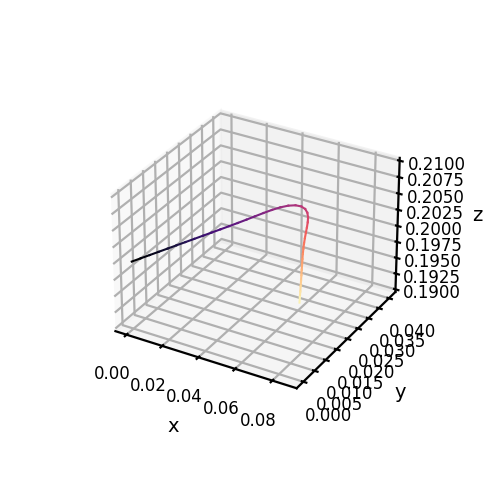

In [303]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200, subplot_kw ={'projection': '3d'})
# ax.plot(sim_data['x'], sim_data['y'], sim_data['z'], color='b', linewidth=1)

cvar = t_sim.copy()
cnorm = mpl.colors.Normalize(vmin=np.min(cvar), vmax=np.max(cvar))
cmap = mpl.colormaps['magma']

# Plot line segments with colors based on x values
for k in range(len(t_sim) - 1):
    ax.plot(sim_data['x'].values[k:k+2],
            sim_data['y'].values[k:k+2],
            sim_data['z'].values[k:k+2],
            color=cmap(cnorm(cvar[k])),
            linewidth=0.75,
            marker='.', markersize=0, markeredgecolor='none')
    
ax.set_xlabel('x', fontsize=7)
ax.set_ylabel('y', fontsize=7)
ax.set_zlabel('z', fontsize=7)

for a in [ax]:
    a.tick_params(axis='both', labelsize=6)
    
ax.set_box_aspect(None, zoom=0.7)

In [304]:
# plt.plot(sim_data['x'])
# plt.plot(sim_data['y'])
# plt.plot(sim_data['z'])

# Observability

In [305]:
# Construct observability matrix in sliding windows
w = 6  # window size
SEOM = SlidingEmpiricalObservabilityMatrix(simulator, t_sim, x_sim, u_sim, w=w, eps=1e-4, parallel=False)

In [306]:
n_window = len(SEOM.O_df_sliding)
print(n_window, 'windows')

35 windows


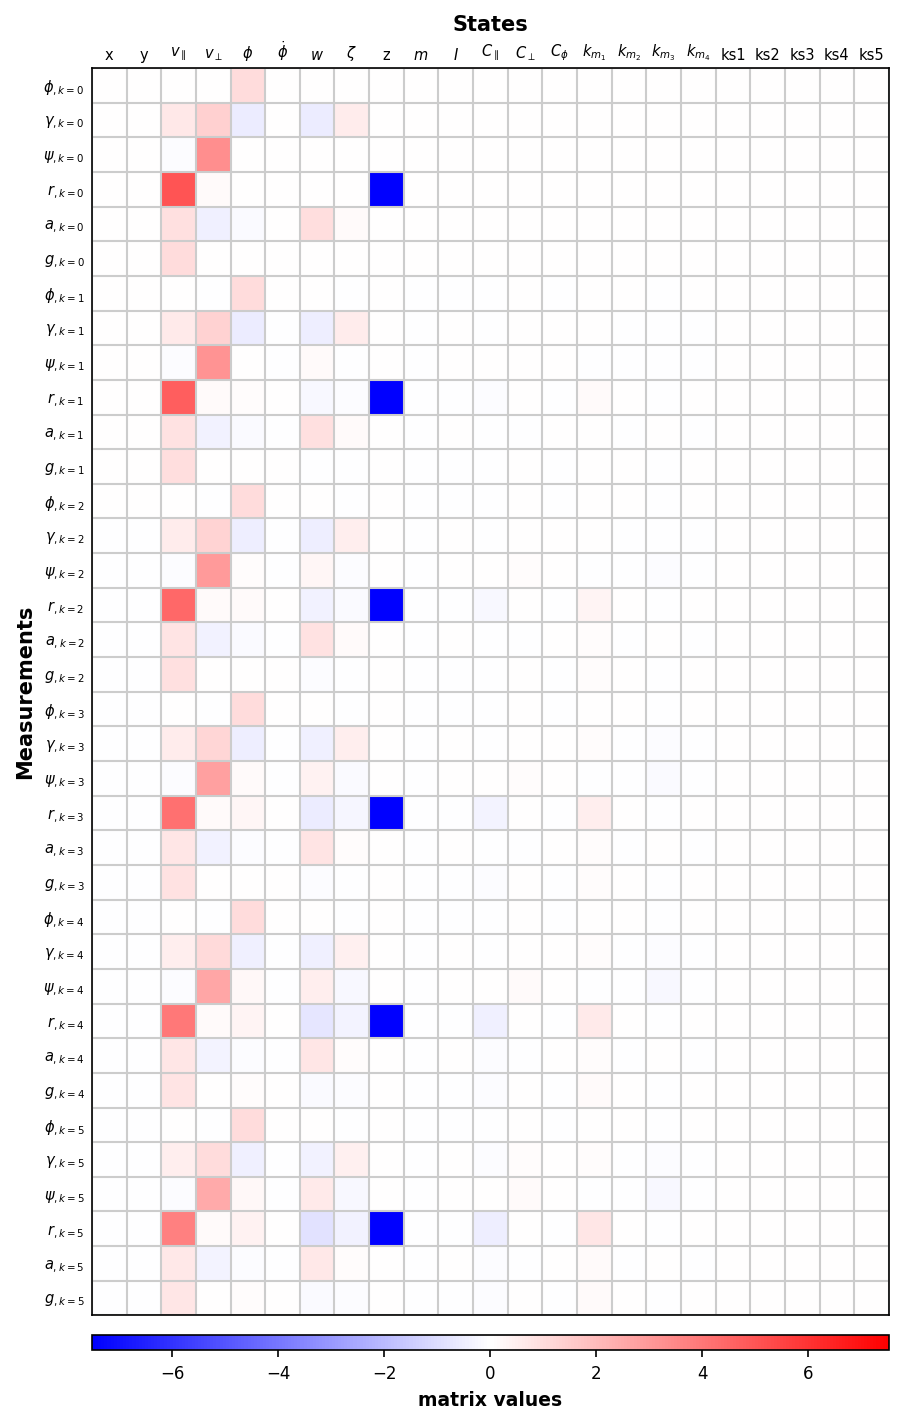

In [307]:
# Visualize observability matrix
OI = ObservabilityMatrixImage(SEOM.O_df_sliding[0], vmax_percentile=99, vmin_ratio=0.5, cmap='bwr')
OI.plot()

# Compute Fisher information matrix & inverse for each sliding window

In [308]:
# Choose sensors to use from O
# o_sensors = ['phi', 'psi', 'gamma', 'a', 'g']
o_sensors = ['phi', 'psi', 'gamma']

# Chose states to use from O
o_states = ['v_para', 'v_perp', 'phi', 'phidot', 'w', 'zeta', 'z', 'm', 'I', 'C_para', 'C_perp', 'C_phi', 'km1', 'km2', 'km3', 'km4']
# o_states = ['v_para', 'v_perp', 'phi', 'phidot', 'w', 'zeta', 'z', 'm', 'I', 'C_para', 'C_perp', 'C_phi']
# o_states = ['v_para', 'v_perp', 'phi', 'phidot', 'w', 'zeta', 'z']

# Choose time-steps to use from O
window_size = 4
o_time_steps = np.arange(0, window_size, step=1)

In [309]:
# Set each sensor noise level separately
sensor_noise = {'phi': 0.1, 'psi': 0.1, 'gamma': 0.1, 'alpha': 0.1, 'a':0.1, 'g': 0.1, 'q': 0.1, 'r': 0.1}

In [310]:
# Compute Fisher information matrix & inverse for each sliding window
EV = []  # collect error variance data for each state over time
shift_index = int(np.round((1/2) * window_size))
shift_time = shift_index * dt  # shift the time forward by half the window size
for k in range(n_window):  # each window
    # Get full O
    O = SEOM.O_df_sliding[k]
    
    # Get subset of O
    O_subset = O.loc[(o_sensors, o_time_steps), o_states].sort_values(['time_step', 'sensor'])
    
    # Compute Fisher information & inverse
    FO = FisherObservability(O_subset, sensor_noise_dict=sensor_noise, sigma=1e-6)
    
    # Collect error variance data
    ev = FO.error_variance.copy()
    ev.insert(0, 'time_initial', SEOM.t_sim[k] + 0.0*shift_time)
    EV.append(ev)

# Concatenate error variance & make same size as simulation data
EV = pd.concat(EV, axis=0, ignore_index=True)
EV.index = np.arange(shift_index, EV.shape[0] + shift_index, step=1, dtype=int)
time_df = pd.DataFrame(np.atleast_2d(sim_data['time']).T, columns=['time'])
EV_aligned = pd.concat((time_df, EV), axis=1)

In [311]:
EV_aligned

,time,time_initial,v_para,v_perp,phi,phidot,w,zeta,z,m,I,C_para,C_perp,C_phi,km1,km2,km3,km4
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.00,260789.745962,289.842183,0.078780,1013.795719,195351.265771,685879.775761,1000000.0,880165.164477,999999.889457,818173.432135,813686.715308,999999.999890,605170.695422,606674.961406,605659.258608,999999.806793
3,0.03,0.01,258076.960999,292.739840,0.078875,1017.762164,194178.579100,677517.918778,1000000.0,948989.127372,999999.975168,818479.108845,814877.338431,999999.999878,605347.426104,607816.043649,605911.854760,999999.941732
4,0.04,0.02,262368.409201,302.795973,0.078637,1006.485025,195347.576719,690145.214109,1000000.0,999524.761713,999999.889539,818629.106458,815575.953918,999999.999924,605471.819032,602619.799465,606120.146719,999999.993352
5,0.05,0.03,262336.544034,308.517584,0.078637,1006.532999,195269.147188,690400.911447,1000000.0,999529.364968,999999.842422,818624.010294,815570.279815,999999.999974,605461.897883,602531.800506,606109.764467,999999.993644
6,0.06,0.04,262277.366363,314.258641,0.078637,1006.596486,195182.167142,690575.603514,1000000.0,999528.940833,999999.852115,818619.061316,815565.034697,999999.999997,605451.338645,602453.366923,606099.419217,999999.969757
7,0.07,0.05,262221.057665,320.050248,0.078613,1005.796114,195096.151053,690758.051889,1000000.0,999528.679244,999999.892301,818614.041911,815559.707576,999999.999992,605440.799378,602092.914485,606089.136998,999999.942044
8,0.08,0.06,262163.780217,325.888221,0.078614,1005.870235,195009.698929,690936.463262,1000000.0,999528.315694,999999.937532,818609.041114,815554.323876,999999.999970,605430.304447,602018.264650,606078.871067,999999.922563
9,0.09,0.07,262106.442662,331.773577,0.078615,1005.944464,194923.221743,691113.868683,1000000.0,999527.871727,999999.972751,818604.050423,815548.877029,999999.999944,605419.833823,601943.480223,606068.637506,999999.915955


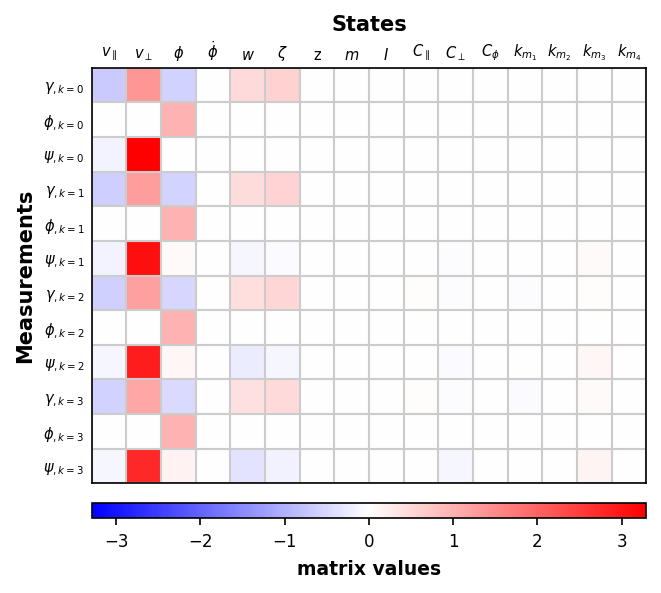

In [312]:
# Visualize observability matrix subset
OI = ObservabilityMatrixImage(O_subset, vmax_percentile=100, vmin_ratio=1.0, cmap='bwr')
OI.plot()

# Plot error variance as color on state time-series

In [313]:
EV_no_nan = EV_aligned.fillna(method='bfill').fillna(method='ffill')

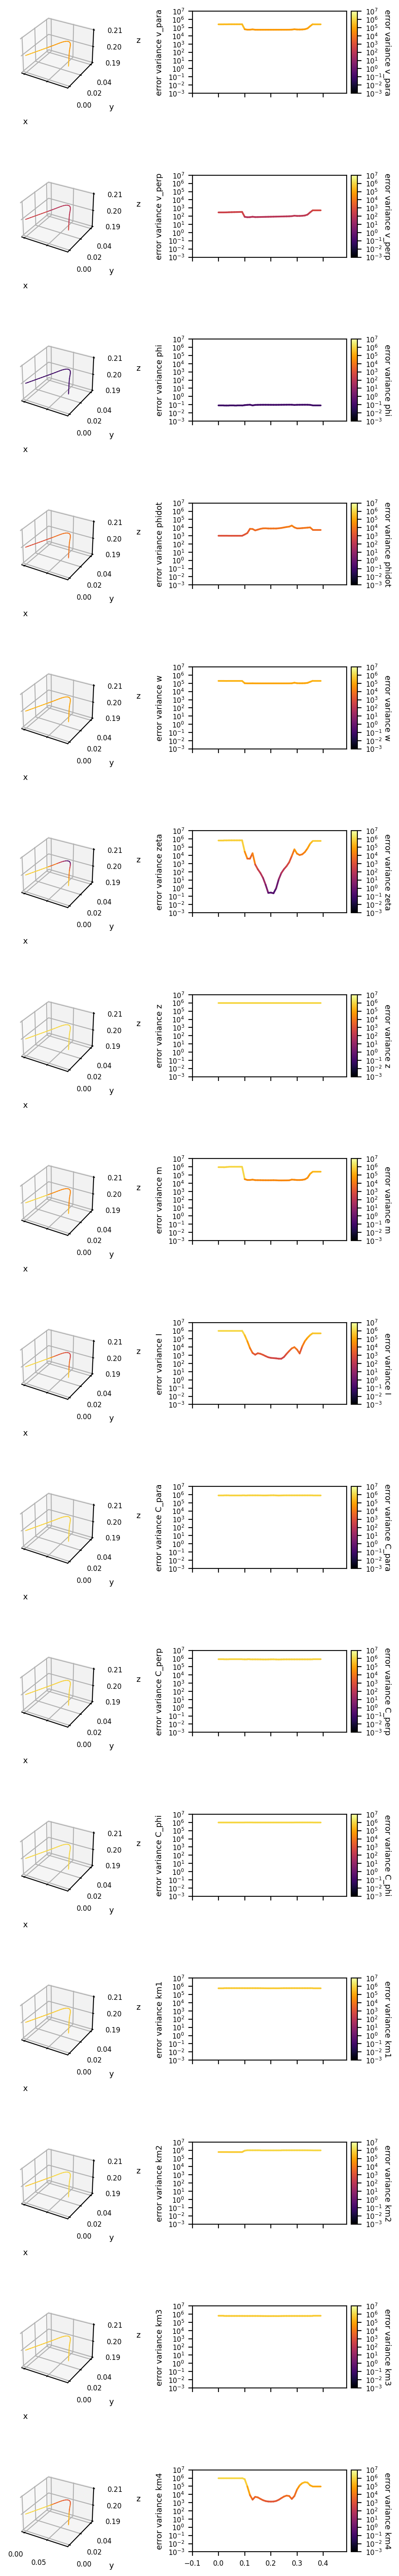

In [314]:
n_state = len(o_states)

cmap = mpl.colormaps['inferno']

log_tick_low = -3
log_tick_high = 7
ticks = np.logspace(log_tick_low, log_tick_high, log_tick_high-log_tick_low + 1)
cnorm = mpl.colors.LogNorm(10**log_tick_low, 10**log_tick_high)

fig = plt.figure(figsize=(5, 2.5*n_state), dpi=200)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.0, 1.0], height_ratios=[1.0])

ax_traj = subfigs[0].subplots(nrows=n_state, ncols=1, sharex=True, sharey=True, subplot_kw ={'projection': '3d'}) 
ax_ev = subfigs[1].subplots(nrows=n_state, ncols=1, sharex=True, sharey=True)


for n, state_name in enumerate(o_states):
    cvar = EV_no_nan[state_name].values
    
    # Plot line segments with colors based on x values
    ax = ax_traj[n]
    for k in range(len(t_sim) - 1):
        ax.plot(sim_data['x'].values[k:k+2],
                sim_data['y'].values[k:k+2],
                sim_data['z'].values[k:k+2],
                color=cmap(cnorm(cvar[k])),
                linewidth=0.75,
                marker='.', markersize=0, markeredgecolor='none')
        
    ax.set_xlabel('x', fontsize=7)
    ax.set_ylabel('y', fontsize=7)
    ax.set_zlabel('z', fontsize=7)
    
    # Error variance
    colorline(sim_data['time'].values, EV_no_nan[state_name].values, EV_no_nan[state_name].values, ax=ax_ev[n], cmap=cmap, norm=cnorm)
    
    ax_ev[n].set_ylim(10**log_tick_low, 10**log_tick_high)
    ax_ev[n].set_yscale('log')
    ax_ev[n].set_ylabel('error variance ' + state_name, fontsize=7)
    ax_ev[n].set_yticks(ticks)
    ax_ev[n].set_xlim(t_sim[0] - 0.1, t_sim[-1] + 0.1)

    # Colorbar
    cax = ax_ev[n].inset_axes([1.03, 0.0, 0.04, 1.0])
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=cnorm, cmap=cmap), cax=cax, ticks=ticks)
    cbar.set_label('error variance ' + state_name, rotation=270, fontsize=7, labelpad=8)
    cbar.ax.tick_params(labelsize=6)

for a in list(ax_traj.flat) + list(ax_ev.flat):
    a.tick_params(axis='both', which='major', labelsize=6)
    
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=1.0)
